<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning/clase_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Gu√≠a Paso a Paso: K-Means Clustering y Segmentaci√≥n de Clientes

## Objetivo de la clase

Aprender a usar algoritmos no supervisados, espec√≠ficamente **K-Means**, para descubrir patrones ocultos en los datos. Aplicaremos este m√©todo para **segmentar clientes** y luego realizaremos nuevos ejercicios con distintos contextos y datasets.

---

## üîß Parte 1: Caso pr√°ctico con dataset real

### 1. Cargar y explorar el dataset

```python
import pandas as pd

url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

df.head()
```

### 2. Preprocesamiento y selecci√≥n de variables

```python
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

### 3. M√©todo del Codo (Elbow Method)

```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("M√©todo del Codo para elegir K")
plt.xlabel("N√∫mero de Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()
```

### 4. Entrenar modelo y crear clusters

```python
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)
```

### 5. Visualizaci√≥n con PCA

```python
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentaci√≥n de Clientes (K-Means + PCA)")
plt.show()
```

### 6. Interpretaci√≥n y propuesta de estrategias

```python
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
```



In [1]:
import pandas as pd

url = "https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv"
df = pd.read_csv(url)

df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Valores unicos de CustomerID
df['CustomerID'].nunique()

200

In [5]:
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [7]:
%pip install estyp


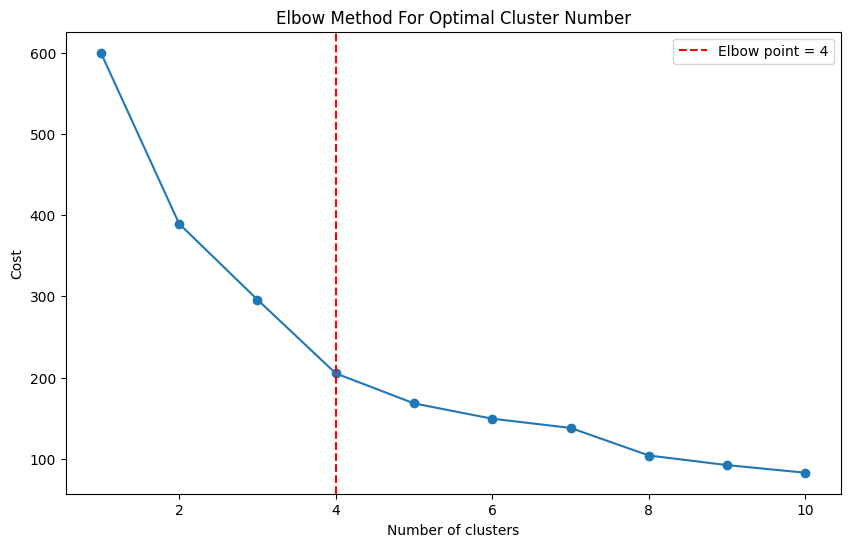

In [9]:
from sklearn.cluster import KMeans
from estyp.cluster import NClusterSearch


searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

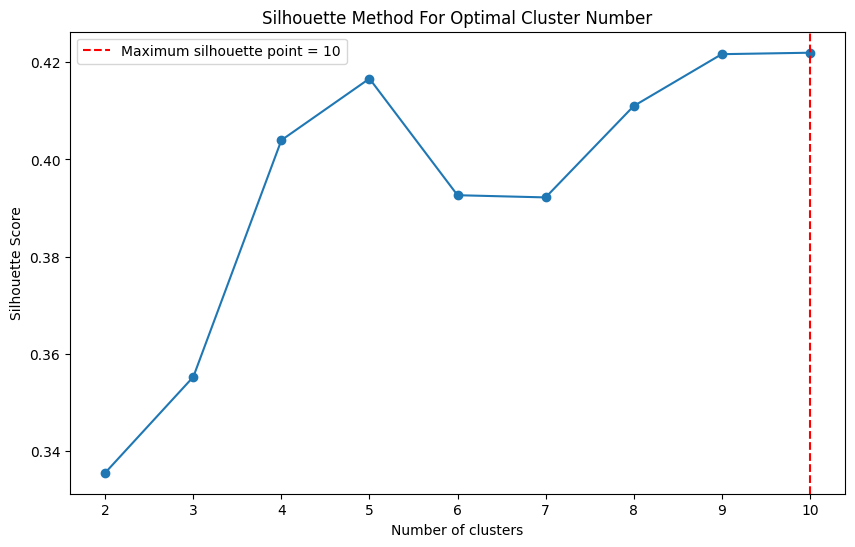

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from estyp.cluster import NClusterSearch

searcher = NClusterSearch(estimator=KMeans(), method='silhouette')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

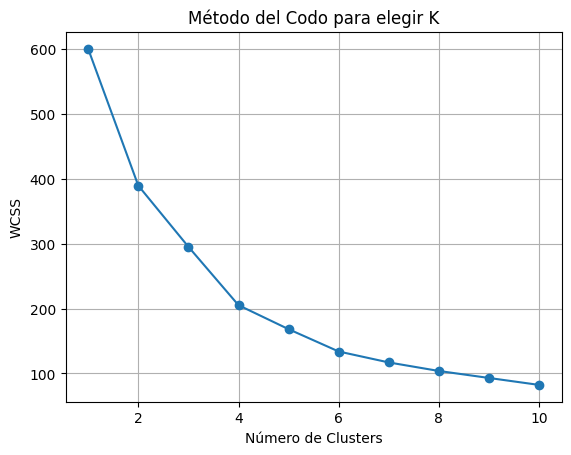

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("M√©todo del Codo para elegir K")
plt.xlabel("N√∫mero de Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

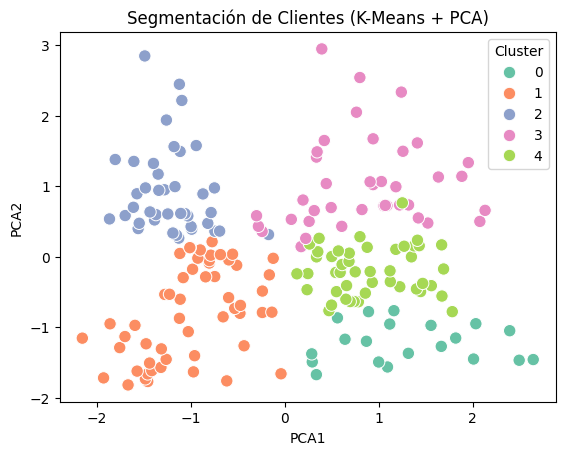

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80)
plt.title("Segmentaci√≥n de Clientes (K-Means + PCA)")
plt.show()

In [14]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()


Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064

In [15]:
df.groupby("Cluster")["Age"].count()

Cluster
0    20
1    54
2    40
3    39
4    47
Name: Age, dtype: int64

In [20]:
df.groupby("Cluster")["CustomerID"]

---

## Parte 2: Actividades posteriores por grupos

Cada grupo debe elegir un nuevo dataset y aplicar K-Means o una t√©cnica alternativa como DBSCAN o Agglomerative Clustering. Aqu√≠ algunos casos sugeridos:

---

### Ejercicio 1: Segmentaci√≥n de vinos

- **Objetivo:** Agrupar distintos tipos de vino en funci√≥n de sus caracter√≠sticas qu√≠micas.
- **Extensi√≥n:** Comparar resultados de K-Means con clustering jer√°rquico.

```python
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()
```

---

### Ejercicio 2: Agrupamiento de pa√≠ses por desarrollo humano

- **Objetivo:** Agrupar pa√≠ses seg√∫n indicadores como educaci√≥n, ingreso, esperanza de vida.
- **Extensi√≥n:** Analizar similitudes regionales y brechas globales.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/bromero26/human-development-index/master/hdi_human_development_index.csv"
df = pd.read_csv(url)

# Seleccionar columnas m√°s recientes (por ej. 'geo', '2015' o '2019')
df = df[['geo', '2015']].dropna()
df.head()
```

---

### Ejercicio 3: Agrupamiento de canciones por caracter√≠sticas musicales

- **Objetivo:** Agrupar canciones seg√∫n tempo, energ√≠a, baileabilidad, etc.
- **Extensi√≥n:** Proponer una playlist personalizada para cada cluster.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

# Seleccionar variables musicales relevantes
df = df[["danceability","energy","tempo","valence","loudness"]].dropna()

df.head()
```

---

### Ejercicio 4: Segmentaci√≥n de estudiantes

- **Objetivo:** Agrupar estudiantes seg√∫n h√°bitos de estudio, rendimiento y contexto social.
- **Extensi√≥n:** Proponer estrategias de apoyo personalizadas para cada grupo.

```python
import pandas as pd

url = "https://raw.githubusercontent.com/yogeshsachdeva223/Student_mat_exploration_and_visualisation/main/student-mat.csv"
df = pd.read_csv(url)

# Verificar estructura
df.head()
```

---

## Recomendaciones para grupos

1. **Analicen bien las variables:** ¬øCu√°les son num√©ricas, cu√°les deben codificarse?
2. **Visualicen sus clusters:** Con `PCA`, `t-SNE` o `Seaborn pairplot`.
3. **Interpreten los resultados:** ¬øQu√© patrones encontraron? ¬øQu√© caracteriza a cada grupo?
4. **Propongan acciones concretas:** Desde marketing a intervenciones educativas.


In [21]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target

df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [22]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

# Dataset de Segmentaci√≥n de Vinos ‚Äì Descripci√≥n de Variables

Este dataset contiene medidas qu√≠micas de distintos vinos cultivados en la regi√≥n italiana de Piamonte. Las variables corresponden a concentraciones de distintos compuestos.

| Variable | Descripci√≥n |
|----------|-------------|
| `alcohol` | Porcentaje de alcohol en el vino. |
| `malic_acid` | Concentraci√≥n de √°cido m√°lico (g/L), un √°cido natural presente en muchas frutas. |
| `ash` | Contenido de cenizas del vino (g/L), relacionado con componentes minerales. |
| `alcalinity_of_ash` | Alcalinidad de la ceniza, una medida del contenido alcalino (b√°sico) de los residuos minerales. |
| `magnesium` | Concentraci√≥n de magnesio (mg/L), un mineral que afecta el sabor y la calidad del vino. |
| `total_phenols` | Cantidad total de compuestos fen√≥licos (mg/L), que influyen en el sabor, color y cuerpo del vino. |
| `flavanoids` | Subgrupo de los fenoles, compuestos con propiedades antioxidantes y gran influencia en el sabor. |
| `nonflavanoid_phenols` | Fenoles no flavonoides, tambi√©n afectan el sabor y propiedades antioxidantes del vino. |
| `proanthocyanins` | Tipo de taninos, compuestos fen√≥licos que afectan la astringencia y el color del vino. |
| `color_intensity` | Intensidad del color del vino. |
| `hue` | Matiz del color, relaci√≥n entre dos longitudes de onda de absorci√≥n (medida espectrofotom√©trica). |
| `od280/od315_of_diluted_wines` | Relaci√≥n entre las absorbancias a 280 nm y 315 nm de un vino diluido, usada como medida de calidad. |
| `proline` | Amino√°cido presente en el vino (mg/L), relacionado con el sabor y el envejecimiento. |
| `target` | Clase del vino (0, 1 o 2), es decir, la variedad de uva usada para producirlo. |

> Nota: Estas variables se usan frecuentemente en an√°lisis de clustering (como K-Means) o clasificaci√≥n supervisada.


In [ ]:
# Seleccionar columnas m√°s recientes (por ej. 'geo', '2015' o '2019')
df = df[['geo', '2015']].dropna()

In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/bromero26/human-development-index/master/hdi_human_development_index.csv"
df = pd.read_csv(url)


df.head()

geo   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0  Afghanistan  0.295  0.300  0.309  0.305  0.300  0.324  0.328  0.332  0.335   
1      Albania  0.635  0.618  0.603  0.608  0.616  0.628  0.637  0.636  0.646   
2      Algeria  0.577  0.581  0.587  0.591  0.595  0.600  0.609  0.617  0.627   
3      Andorra    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4       Angola    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   ...   2006   2007   2008   2009   2010   2011   2012   2013   2014   2015  
0  ...  0.415  0.433  0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479  
1  ...  0.703  0.713  0.721  0.725  0.738  0.752  0.759  0.761  0.762  0.764  
2  ...  0.690  0.697  0.705  0.714  0.724  0.732  0.737  0.741  0.743  0.745  
3  ...    NaN    NaN    NaN    NaN  0.819  0.819  0.843  0.850  0.857  0.858  
4  ...  0.454  0.468  0.480  0.488  0.495  0.508  0.523  0.527  0.531  0.533  

[5 rows x 27 columns]

# Descripci√≥n de las columnas del dataset de √çndice de Desarrollo Humano (IDH)

Este dataset contiene los valores hist√≥ricos del **√çndice de Desarrollo Humano (IDH)** por pa√≠s, desde el a√±o 1990 hasta 2015.

| Columna | Descripci√≥n |
|---------|-------------|
| `geo`   | Nombre del pa√≠s o territorio. Es la √∫nica columna con valores de tipo texto (string). |
| `1990`, `1991`, ..., `2015` | Cada una de estas columnas representa el valor del IDH para ese a√±o espec√≠fico. Los valores est√°n entre 0 y 1, donde: |
|         | - 1 indica el m√°ximo desarrollo humano. |
|         | - 0 indica el m√≠nimo desarrollo humano. |

## Ejemplo de fila

| geo        | 1990 | 1991 | 1992 | ... | 2015 |
|------------|------|------|------|-----|------|
| Afghanistan | 0.295 | 0.300 | 0.309 | ... | 0.479 |

Esto indica que el **IDH de Afganist√°n en 1990 fue de 0.295**, y en **2015 fue de 0.479**, lo cual representa una mejora significativa a lo largo de 25 a√±os.

> üí° El IDH es un indicador compuesto publicado por las Naciones Unidas, que mide:
> - **Esperanza de vida al nacer** (salud)
> - **Educaci√≥n** (a√±os promedio de escolaridad y a√±os esperados de escolaridad)
> - **Ingreso nacional bruto per c√°pita** (nivel de vida)

## Valores faltantes

Algunos pa√≠ses tienen valores `NaN`, lo que significa que **no hay datos disponibles para esos a√±os**. Esto es com√∫n en pa√≠ses muy peque√±os, en conflicto, o donde no se recopilaron datos sistem√°ticamente.

``


In [24]:
import pandas as pd

url = "https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv"
df = pd.read_csv(url)

df.head()

id                                           name  \
0  6KbQ3uYMLKb5jDxLF7wYDD                    Singende Bataillone 1. Teil   
1  6KuQTIu1KoTTkLXKrwlLPV       Fantasiest√ºcke, Op. 111: Pi√π tosto lento   
2  6L63VW0PibdM1HDSBoqnoM                 Chapter 1.18 - Zamek kaniowski   
3  6M94FkXd15sOAOQYRnWPN8  Bebamos Juntos - Instrumental (Remasterizado)   
4  6N6tiFZ9vLTSOIxkj8qKrd    Polonaise-Fantaisie in A-Flat Major, Op. 61   

                                    artists  duration_ms release_date  year  \
0                       ['Carl Woitschach']       158648         1928  1928   
1  ['Robert Schumann', 'Vladimir Horowitz']       282133         1928  1928   
2                   ['Seweryn Goszczy≈Ñski']       104300         1928  1928   
3                      ['Francisco Canaro']       180760      9/25/28  1928   
4  ['Fr√©d√©ric Chopin', 'Vladimir Horowitz']       687733         1928  1928   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0         0.995         0.708  0.1950             0.563    0.1510   -12.428   
1         0.994         0.379  0.0135             0.901    0.0763   -28.454   
2         0.604         0.749  0.2200             0.000    0.1190   -19.924   
3         0.995         0.781  0.1300             0.887    0.1110   -14.734   
4         0.990         0.210  0.2040             0.908    0.0980   -16.829   

   speechiness    tempo  valence  mode  key  popularity  explicit  
0       0.0506  118.469   0.7790     1   10           0         0  
1       0.0462   83.972   0.0767     1    8           0         0  
2       0.9290  107.177   0.8800     0    5           0         0  
3       0.0926  108.003   0.7200     0    1           0         0  
4       0.0424   62.149   0.0693     1   11           1         0

# Descripci√≥n de las columnas del dataset de Spotify

Este dataset contiene metadatos y caracter√≠sticas de audio de canciones provenientes de Spotify. A continuaci√≥n se describen las columnas incluidas:

| Columna | Descripci√≥n |
|---------|-------------|
| `id` | Identificador √∫nico de la canci√≥n en Spotify. |
| `name` | Nombre o t√≠tulo de la canci√≥n. |
| `artists` | Lista de artistas que interpretan la canci√≥n. |
| `duration_ms` | Duraci√≥n de la canci√≥n en milisegundos. |
| `release_date` | Fecha de lanzamiento de la canci√≥n (puede tener solo el a√±o o la fecha completa). |
| `year` | A√±o de lanzamiento (extra√≠do de `release_date`). |
| `acousticness` | Nivel de ac√∫stica de la canci√≥n. Valor entre 0.0 y 1.0, donde valores cercanos a 1.0 indican alta probabilidad de ser ac√∫stica. |
| `danceability` | Nivel de "bailabilidad" de la canci√≥n, basado en tempo, ritmo y estabilidad. Rango de 0.0 a 1.0. |
| `energy` | Medida de intensidad y actividad percibida. Valores altos implican canciones r√°pidas, ruidosas y potentes. Rango: 0.0 a 1.0. |
| `instrumentalness` | Estima la probabilidad de que una canci√≥n no contenga voces. Un valor cercano a 1.0 sugiere que es instrumental. |
| `liveness` | Probabilidad de que la canci√≥n haya sido grabada en vivo. Valores m√°s altos indican una mayor presencia de audiencia. |
| `loudness` | Volumen general de la pista en decibelios (dB). Cuanto m√°s negativo el n√∫mero, m√°s suave es la canci√≥n. |
| `speechiness` | Indica la presencia de palabras habladas en la canci√≥n. Valores altos se asocian con rap, podcasts, etc. |
| `tempo` | Tempo estimado de la canci√≥n en pulsaciones por minuto (BPM). |
| `valence` | Describe la positividad musical de una canci√≥n. Valores cercanos a 1.0 indican emociones m√°s alegres y positivas. |
| `mode` | Modalidad de la canci√≥n: 1 para mayor (sonido m√°s alegre), 0 para menor (sonido m√°s triste). |
| `key` | Tono musical de la canci√≥n representado como un n√∫mero entero (0 = Do, 1 = Do#, ..., 11 = Si). |
| `popularity` | Popularidad de la canci√≥n en Spotify (escala de 0 a 100). |
| `explicit` | Indica si la canci√≥n contiene lenguaje expl√≠cito: 1 = s√≠, 0 = no. |

> üéµ Este tipo de datos es ideal para an√°lisis musical, clustering, recomendaciones, visualizaciones y estudios de tendencias sonoras.


In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/yogeshsachdeva223/Student_mat_exploration_and_visualisation/main/student-mat.csv"
df = pd.read_csv(url)

# Verificar estructura
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

# Descripci√≥n de las columnas del dataset `student-mat.csv`

Este dataset contiene informaci√≥n socioecon√≥mica, escolar y personal de estudiantes, junto con sus notas finales. Las variables ayudan a explorar c√≥mo distintos factores pueden afectar el rendimiento acad√©mico.

## Variables demogr√°ficas y familiares

| Columna | Descripci√≥n |
|---------|-------------|
| `school` | Escuela del estudiante: `GP` = Gabriel Pereira, `MS` = Mousinho da Silveira. |
| `sex` | Sexo del estudiante: `F` = femenino, `M` = masculino. |
| `age` | Edad del estudiante (en a√±os). |
| `address` | Tipo de domicilio: `U` = urbano, `R` = rural. |
| `famsize` | Tama√±o de la familia: `LE3` = 3 o menos miembros, `GT3` = m√°s de 3 miembros. |
| `Pstatus` | Estado civil de los padres: `T` = viven juntos, `A` = separados. |
| `Medu` | Nivel educativo de la madre (0: ninguno, 1: educaci√≥n b√°sica, 2: secundaria, 3: preparatoria, 4: superior). |
| `Fedu` | Nivel educativo del padre (escala igual a `Medu`). |
| `Mjob` | Trabajo de la madre (por ejemplo: `teacher`, `health`, `services`, `at_home`, `other`). |
| `Fjob` | Trabajo del padre (categor√≠as similares a `Mjob`). |

## Apoyo escolar y social

| Columna | Descripci√≥n |
|---------|-------------|
| `reason` | Raz√≥n principal para elegir esta escuela (`home`, `reputation`, `course`, `other`). |
| `guardian` | Tutor legal: `mother`, `father`, u `other`. |
| `traveltime` | Tiempo de viaje a la escuela (1: <15 min, 2: 15‚Äì30 min, 3: 30‚Äì60 min, 4: >1 hora). |
| `studytime` | Tiempo semanal de estudio (1: <2 horas, 2: 2‚Äì5 horas, 3: 5‚Äì10 horas, 4: >10 horas). |
| `failures` | N√∫mero de cursos reprobados anteriormente (0‚Äì3+). |
| `schoolsup` | Apoyo escolar extra (clases particulares): `yes` o `no`. |
| `famsup` | Apoyo educativo de la familia: `yes` o `no`. |
| `paid` | Clases pagadas extracurriculares (por ejemplo, refuerzo): `yes` o `no`. |
| `activities` | Participaci√≥n en actividades extracurriculares: `yes` o `no`. |
| `nursery` | Asistencia a jard√≠n infantil: `yes` o `no`. |
| `higher` | Desea realizar estudios superiores: `yes` o `no`. |
| `internet` | Acceso a internet en casa: `yes` o `no`. |
| `romantic` | Est√° en una relaci√≥n rom√°ntica: `yes` o `no`. |

## Bienestar personal y entorno

| Columna | Descripci√≥n |
|---------|-------------|
| `famrel` | Calidad de la relaci√≥n familiar (1: muy mala a 5: excelente). |
| `freetime` | Tiempo libre despu√©s de clases (1: muy poco a 5: mucho). |
| `goout` | Frecuencia de salidas con amigos (1: nunca a 5: siempre). |
| `Dalc` | Consumo de alcohol entre semana (1: muy bajo a 5: muy alto). |
| `Walc` | Consumo de alcohol durante el fin de semana (1: muy bajo a 5: muy alto). |
| `health` | Estado de salud actual (1: muy malo a 5: muy bueno). |
| `absences` | N√∫mero de ausencias escolares. |

## Notas acad√©micas

| Columna | Descripci√≥n |
|---------|-------------|
| `G1` | Nota en la primera evaluaci√≥n (escala de 0 a 20). |
| `G2` | Nota en la segunda evaluaci√≥n (escala de 0 a 20). |
| `G3` | Nota final (escala de 0 a 20). Esta es la **variable objetivo** en tareas de predicci√≥n de rendimiento acad√©mico. |

---

> üéì Este dataset es ideal para analizar factores que influyen en el rendimiento escolar, explorar correlaciones y construir modelos de predicci√≥n (por ejemplo, regresi√≥n, √°rboles de decisi√≥n, etc.).
